In [11]:
import wikipedia
import requests
import spacy
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

In [2]:
nlp = spacy.load('en_core_web_sm')

In [3]:
result = wikipedia.search("World War 2")
result

['World War II',
 'World War II casualties',
 'Military history of the United States during World War II',
 'World war',
 'Causes of World War II',
 'Allies of World War II',
 'World War I',
 'Timeline of World War II',
 'List of aircraft of World War II',
 'Call of Duty: WWII']

In [4]:
page = wikipedia.page(result[0], preload= True)

In [5]:
page.url

'https://en.wikipedia.org/wiki/World_War_II'

In [55]:
page.content

'The 2016 United States elections were held on Tuesday, November 8, 2016. Republican nominee Donald Trump defeated Democratic former Secretary of State Hillary Clinton in the presidential election, while Republicans retained control of Congress.\nTrump won his party\'s nomination after defeating Ted Cruz and several other candidates in the 2016 Republican presidential primaries. With Democratic president Barack Obama term-limited, Clinton defeated Bernie Sanders in the 2016 Democratic presidential primaries. Trump won the general election with 304 of the 538 electoral votes, though Clinton won the popular vote by a margin of 2.1 percentage points (2,868,686 votes). The United States government\'s intelligence agencies later concluded that the Russian government had interfered in the elections.\nWall Street banks and other big financial institutions spent a record $2 billion trying to influence the 2016 United States elections.Democrats won a net gain of two seats in the Senate and six 

In [6]:
doc = nlp(page.content)

In [7]:
max_token_display = 10 
for idx , token in enumerate(doc):
    # Print the token and its part-of-speech tag
    print(token.text, "-->", token.pos_, )
    if idx > max_token_display:
        break;

World --> PROPN
War --> PROPN
II --> PROPN
( --> PUNCT
WWII --> PROPN
or --> CCONJ
WW2 --> PROPN
) --> PUNCT
, --> PUNCT
also --> ADV
known --> VERB
as --> SCONJ


In [8]:
for idx , ent in enumerate(doc.ents):
    print(ent.text, ent.start_char, ent.end_char, ent.label_)
    if idx>max_token_display:
        break

World War II 0 12 EVENT
the Second World War 42 62 EVENT
from 1939 to 1945 93 110 DATE
two 206 209 CARDINAL
more than 100 million 308 329 CARDINAL
more than 30 345 357 CARDINAL
World War II 550 562 EVENT
70 to 85 million 621 637 CARDINAL
Tens of millions 702 718 CARDINAL
World War II 983 995 EVENT
1 September 1939 1037 1053 DATE
Poland 1076 1082 GPE


In [9]:
persons  = [ent.text for ent in doc.ents if ent.label_=='PERSON']
person_count = Counter(persons)
person_count = person_count.most_common(5)

print(person_count)

[('Hitler', 22), ('Mussolini', 4), ('Roosevelt', 4), ('Wehrmacht', 3), ('Kharkov', 3)]


In [12]:
person_df = pd.DataFrame(person_count, columns =['Name', 'Count']) 

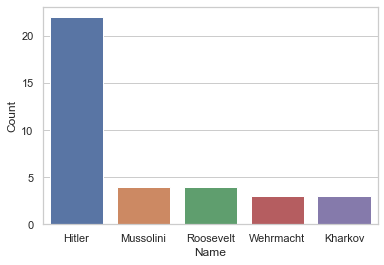

In [13]:
sns.set_theme(style="whitegrid")
ax1 = sns.barplot(x="Name", y="Count", data=person_df, orient='v')

In [134]:
ax1.figure.savefig('ner_ww2_person.png')

In [15]:
gpe  = [ent.text for ent in doc.ents if ent.label_=='GPE']
gpe_count = Counter(gpe)
gpe_count = gpe_count.most_common(15)

print(gpe_count)

[('Germany', 111), ('Japan', 83), ('the Soviet Union', 50), ('Italy', 38), ('France', 33), ('China', 30), ('the United States', 27), ('Poland', 26), ('the United Kingdom', 21), ('Romania', 12), ('Finland', 9), ('The Soviet Union', 9), ('Czechoslovakia', 8), ('Yugoslavia', 8), ('North Africa', 7)]


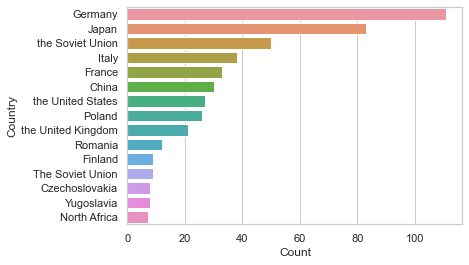

In [16]:
country_df = pd.DataFrame(gpe_count, columns =['Country', 'Count']) 
sns.set_theme(style="whitegrid")
ax2 = sns.barplot(x="Count", y="Country", data=country_df, orient='h')

In [18]:
ax2.figure.savefig('ner_ww2_country.png')

In [124]:
org  = [ent.text for ent in doc.ents if ent.label_=='ORG']
org_count = Counter(org)
org_count = org_count.most_common(15)

print(org_count)

[('Allied', 33), ('Allies', 20), ('the Western Allies', 16), ('the League of Nations', 6), ('Axis', 6), ('the Eastern Front', 5), ('ISBN', 5), ('Commonwealth', 3), ('UN', 2), ('Security Council', 2)]


In [125]:
org_df = pd.DataFrame(org_count, columns =['Org', 'Count']) 
org_df.head()

,Org,Count
0,Allied,33
1,Allies,20
2,the Western Allies,16
3,the League of Nations,6
4,Axis,6


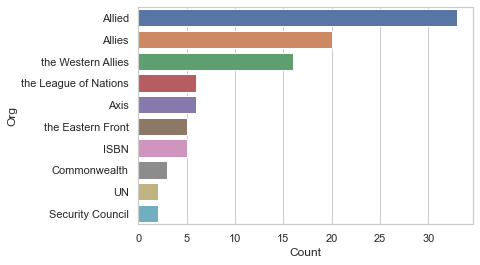

In [128]:
sns.set_theme(style="whitegrid")
ax3 = sns.barplot(x="Count", y="Org", data=org_df, orient='h')

In [136]:
ax3.figure.savefig('ner_ww2_org.png')